# Working with complicated dataset

Created by Huu Hung Nguyen (ID: 017051866)

Last updated: Nov 26, 2024

Learning outcomes: Dealing with data that are badly formatted and/or spread across multiple files.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [39]:
cols = [
    "query acc.ver", "subject acc.ver", "% identity", "alignment length",
    "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end",
    "evalue", "bit score", "% positives", "bonds", "publications"
    ]
len(cols)

15

In [40]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv",
    na_values=['-', 'missing'],
    comment="#",
    header=None,
    index_col=1,
    names=cols,
    usecols=cols,
    engine='python'
)
df.drop(columns=["query acc.ver"], inplace=True)
df.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, NP_904328.1 to AGS12808.1
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   % identity        100 non-null    float64
 1   alignment length  100 non-null    int64  
 2   mismatches        100 non-null    int64  
 3   gap opens         100 non-null    int64  
 4   q. start          100 non-null    int64  
 5   q. end            100 non-null    int64  
 6   s. start          100 non-null    int64  
 7   s. end            100 non-null    int64  
 8   evalue            100 non-null    int64  
 9   bit score         100 non-null    int64  
 10  % positives       100 non-null    float64
 11  bonds             100 non-null    object 
 12  publications      97 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 10.9+ KB


In [42]:
df.isna().sum()

,0
% identity,0
alignment length,0
mismatches,0
gap opens,0
q. start,0
q. end,0
s. start,0
s. end,0
evalue,0
bit score,0


### Question 2
What is the average number of publications?

In [45]:
df["publications"] = df["publications"].fillna(0)

In [46]:
df.publications.mean()

26.18

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [47]:
df['bonds'] = pd.to_numeric(df['bonds'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

In [48]:
df[df.bonds > 15000].index.tolist()

['AGK29621.1',
 'AHG32084.1',
 '6G2J_H',
 'YP_002791042.1',
 'AGK29634.1',
 '0806162F',
 'YP_009112408.1',
 'YP_001876469.1',
 'YP_009092269.1',
 'AHG32149.1',
 'YP_009092074.1',
 'YP_009450474.1',
 'YP_004123270.1',
 'YP_009092073.1',
 'AHZ60901.1',
 'YP_004123350.1',
 'YP_009453754.1',
 'ADD46492.1',
 'YP_007025968.1',
 'YP_009453806.1',
 'YP_007024956.1',
 'ASM92364.1',
 'YP_006073044.1',
 'ASM92494.1',
 'ADG95699.1',
 'YP_004891275.1',
 'YP_009166014.1',
 'YP_009538416.1',
 'YP_009414182.1',
 'YP_009178854.1',
 'YP_009414415.1',
 'YP_009353908.1',
 'YP_009093743.1',
 'ABX45285.1',
 'YP_009414156.1',
 'YP_009414363.1']

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

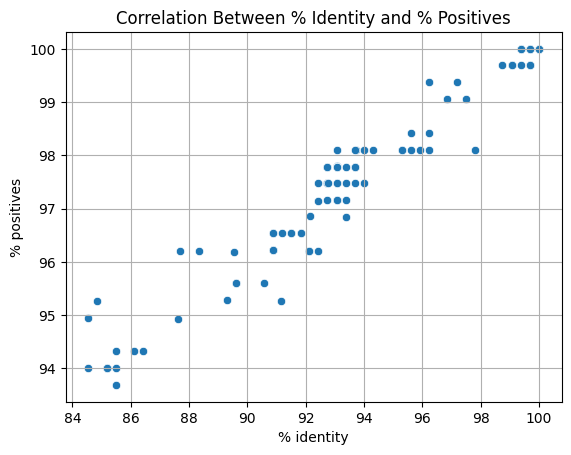

In [49]:
sns.scatterplot(
    data=df,
    x="% identity",
    y="% positives"
)
plt.title("Correlation Between % Identity and % Positives")
plt.grid(True)
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [59]:
protein_df = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv")
protein_df.drop(columns=["Unnamed: 0"], inplace=True)
protein_df.head()

,Protein,Source
0,NP_904328.1,RefSeq
1,YP_220563.1,GenPept
2,YP_002791042.1,GenPept
3,YP_001686698.1,GenPept
4,YP_009112408.1,GenPept


In [60]:
# Merge the dataframes based on 'subject acc.ver' and 'Protein' columns
merged_df = df.merge(protein_df, left_index=True, right_on='Protein', how='left')

merged_df.rename(columns={'Source': 'Protein source'}, inplace=True)

# Fill NaN values in 'Source' column with 'NA'
merged_df['Protein source'] = merged_df['Protein source'].fillna('NA')

merged_df.reset_index(drop=True, inplace=True)

# Display the updated dataframe
merged_df

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein,Protein source
0,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,NP_904328.1,RefSeq
1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,AGK29621.1,NA
2,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,YP_220563.1,GenPept
3,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,ACM24502.1,NA
4,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,AHG32084.1,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,ABX45285.1,NA
96,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,ASP44815.1,NA
97,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,YP_009414156.1,GenPept
98,85.174,317,47,0,1,317,1,317,0,551,94.01,18762,5.0,YP_009414363.1,GenPept
